# Отчет по курсовому проекту
Цуканников Кирилл \
Артем Свирин

## 1. Прямой метод решения системы линейных алгебраических уравнений (слау);

## LU-разложение

## Постановка задачи

Пусть дана квадратная матрица $A \in \mathbb{R}^{n \times n}$.
LU-разложение состоит в представлении матрицы $A$ в виде произведения двух треугольных матриц:

$$
A = L U
$$

где

- $L$ — нижняя треугольная матрица с единицами на диагонали
- $U$ — верхняя треугольная матрица

LU-разложение позволяет эффективно решать системы линейных уравнений $A x = b$ без вычисления обратной матрицы.




## Алгоритм построения LU-разложения

Пусть $A$ — матрица размера $n \times n$.
Инициализируем:

$$
L = I_n, \quad U = A
$$

где $I_n$ — единичная матрица.

### Шаги метода

Для каждого ведущего элемента $U[i,i]$, $i = 0,1,\dots,n-1$:

1. Проверяем, что элемент не слишком мал:

$$
|U[i,i]| < \varepsilon
$$

Если элемент слишком мал, ищем строку с максимальным по модулю элементом в столбце и меняем строки (частичный выбор ведущего).

2. Для каждой строки $j > i$ вычисляем множитель:

$$
L[j,i] = \frac{U[j,i]}{U[i,i]}.
$$

3. Вычитаем из строки $j$ строку $i$, умноженную на множитель:

$$
U[j,i:] = U[j,i:] - L[j,i] \cdot U[i,i:].
$$

После выполнения всех шагов получаем:

$$
A = L U
$$

## Решение системы $A x = b$ с помощью LU-разложения

1. Решаем прямую систему:

$$
L y = b
$$

методом прямого хода.

2. Решаем обратную систему:

$$
U x = y
$$

методом обратного хода.

В результате получаем решение исходной системы $x$.



In [20]:
import sympy
import numpy as np

In [21]:
A = np.array([[1, 2, 3, -2],
              [2, -1, -2, -3],
              [3, 2, -1, 2],
              [2, -3, 2, 1]], dtype=np.float64)
# вектор правой части системы Ax = b
b = np.array([1, 2, -5, 11], dtype=np.float64)

In [22]:
def lu_decomposition(A, b):
    """LU-разложение с решением системы A*x = b"""
    n = A.shape[0]
    eps = 1e-12

    # Инициализация матриц
    L = np.eye(n, dtype=np.float64)  # Единичная матрица
    U = A.copy().astype(np.float64)
    b = b.copy().astype(np.float64)

    # Массив для отслеживания перестановок строк
    P = np.arange(n)

    # LU-разложение с частичным выбором ведущего элемента
    for i in range(n):
        # Выбор ведущего элемента в столбце i
        max_row = i + np.argmax(np.abs(U[i:, i]))

        if np.abs(U[max_row, i]) < eps:
            raise ValueError("Матрица вырождена или плохо обусловлена")

        # Перестановка строк, если необходимо
        if max_row != i:
            # Меняем строки в U
            U[[i, max_row]] = U[[max_row, i]]
            # Меняем строки в L для уже вычисленных элементов
            if i > 0:
                L[[i, max_row], :i] = L[[max_row, i], :i]
            # Меняем строки в b
            b[[i, max_row]] = b[[max_row, i]]
            # Обновляем массив перестановок
            P[i], P[max_row] = P[max_row], P[i]

        # Вычисление множителей и обновление матриц
        for j in range(i+1, n):
            mult = U[j, i] / U[i, i]
            L[j, i] = mult
            U[j, i:] -= mult * U[i, i:]
            U[j, i] = 0.0  # Для чистоты

    # Решение системы L*y = b (прямой ход)
    y = np.zeros(n)
    for i in range(n):
        y[i] = b[i] - np.dot(L[i, :i], y[:i])

    # Решение системы U*x = y (обратный ход)
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (y[i] - np.dot(U[i, i+1:], x[i+1:])) / U[i, i]

    return x

In [23]:
lu_decomposition(A, b)

array([ 0.66666667, -2.38888889,  1.44444444, -0.38888889])

### Решение системы Ax = b
A = L * U  ->  L * U * x = b \
Сначала решаем: L * y = b (прямой ход) \
Потом решаем: U * x = y (обратный ход)


## 2 Альтернативный прямой метод решения слау

# Метод Гаусса с выбором максимального элемента по столбцу

## Постановка задачи

Требуется решить систему линейных алгебраических уравнений:

$$
A x = b,
$$


Метод Гаусса с выбором максимального элемента по столбцу является модификацией классического метода Гаусса и применяется для повышения численной устойчивости вычислений.

## Идея метода

На каждом шаге исключения выбирается ведущий элемент (pivot) как элемент с максимальным модулем в текущем столбце:

$$
|a_{p k}| = \max_{i=k,\dots,n} |a_{i k}|
$$

После этого строки $k$ и $p$ меняются местами, и выполняется обычное исключение Гаусса.




## Алгоритм

Пусть дана расширенная матрица системы:

$$
[A | b]
$$

Для $k = 0,1,\dots,n-1$:

1. Находим индекс строки $p$, для которой

$$
|a_{p k}| = \max_{i=k,\dots,n} |a_{i k}|
$$

2. Меняем строки $k$ и $p$ местами.

3. Для всех $i = k+1,\dots,n$ выполняем исключение:

$$
m_{ik} = \frac{a_{ik}}{a_{kk}}
$$

$$
a_{i j} = a_{i j} - m_{ik} a_{k j}, \quad j=k,\dots,n
$$

$$
b_i = b_i - m_{ik} b_k
$$

После получения верхнетреугольной матрицы выполняется обратный ход.

## Обратный ход

Решение находится из системы:

$$
U x = y
$$

по формулам:

$$
x_n = \frac{y_n}{u_{nn}}
$$

$$
x_i = \frac{1}{u_{ii}}\left(y_i - \sum_{j=i+1}^{n} u_{ij} x_j\right), \quad i=n-1,\dots,1
$$


In [24]:
import numpy as np

def gauss_column_pivot(A, b, eps=1e-12):
    A = A.astype(float).copy()
    b = b.astype(float).copy()
    n = len(b)

    # прямой ход
    for k in range(n):
        # выбор максимального элемента по столбцу
        max_row = np.argmax(np.abs(A[k:, k])) + k

        if abs(A[max_row, k]) < eps:
            raise ValueError("матрица вырождена или плохо обусловлена")

        # перестановка строк
        if max_row != k:
            A[[k, max_row]] = A[[max_row, k]]
            b[[k, max_row]] = b[[max_row, k]]

        # исключение
        for i in range(k+1, n):
            factor = A[i, k] / A[k, k]
            A[i, k:] -= factor * A[k, k:]
            b[i] -= factor * b[k]
            A[i, k] = 0.0

    # Обратный ход
    x = np.zeros(n)

    for i in range(n-1, -1, -1):
        s = np.dot(A[i, i+1:], x[i+1:])
        x[i] = (b[i] - s) / A[i, i]

    return x

In [25]:
A_test = np.array([[1, 2, 3, -2],
                       [2, -1, -2, -3],
                       [3, 2, -1, 2],
                       [2, -3, 2, 1]], dtype=np.float64)
b_test = np.array([1, 2, -5, 11], dtype=np.float64)

x_my = gauss_column_pivot(A_test, b_test)
print("x =", x_my)


x = [ 0.66666667 -2.38888889  1.44444444 -0.38888889]


## 3. Сравнение по критериям двух методов и метода Гаусса из библиотеки

Для тестов мы использваоли несколько типов матрицы:
- 'random' - случайная
- 'hilbert' - матрица Гильберта (плохо обусловленная)
- 'diag_dominant' - с диагональным преобладанием
- 'spd' - симметричная положительно определенная


Размеры матриц рассматривали следующие: 10, 50, 100, 200, 500.
В качестве эталона использовалась функция solve.

Сравнивались три метода:
1. **LU-разложение** (самописное)
2. **Метод Гаусса с выбором ведущего элемента** (самописный)
3. **numpy.linalg.solve** (библиотечный метод)



## 1. Тестирование на конкретных примерах

### Пример 1: Простая матрица 3x3


- Вектор b: `[8, -11, -3]`
- Эталонное решение (`numpy.linalg.solve`): `[2, 3, -1]`

| Метод  | Решение        | Невязка       | Ошибка от эталона |
|--------|----------------|---------------|------------------|
| LU     | `[2, 3, -1]`   | 1.83e-15      | 2.71e-15         |
| Gauss  | `[2, 3, -1]`   | 8.88e-16      | 1.26e-15         |

Вывод: Все методы дали точное решение Самый точный по невязке — метод Гаусса.



### Пример 2: Матрица Гильберта 4x4 (плохо обусловленная)
- Обусловленность: `1.55e+04`
- Эталонное решение: `[-4, 60, -180, 140]`

| Метод  | Невязка       | Ошибка от эталона |
|--------|---------------|------------------|
| LU     | 3.24e-15      | 5.29e-12         |
| Gauss  | 2.23e-15      | 5.39e-12         |

Вывод: Для плохо обусловленных матриц ошибка растет до порядка `1e-12`, но все методы дают корректное решение по знакам и величинам.



### Пример 3: Матрица с диагональным преобладанием 5x5
- Эталонное решение: `[1, 1, 1, 1, 1]`

| Метод  | Невязка       | Ошибка от эталона |
|--------|---------------|------------------|
| LU     | 3.55e-15      | 2.48e-16         |
| Gauss  | 0.00e+00      | 1.11e-16         |

Вывод: Методы точные, ошибка минимальна. Метод Гаусса иногда показывает хорошую невязку .
Для наглядности также рассмотрю матрицу 500 на 500.
### Размер 500x500

| Тип матрицы       | Метод          | Время (сек) | Невязка        | Ошибка          |
|------------------|----------------|-------------|----------------|----------------|
| random           | LU             | 0.284645    | 1.38e-14       | 5.16e-17       |
|                  | Gauss          | 0.180770    | 1.89e-14       | 4.15e-17       |
|                  | numpy.solve    | 0.006662    | 2.37e-14       | 0.00e+00       |
| diag_dominant    | LU             | 0.288694    | 1.88e-14       | 6.86e-16       |
|                  | Gauss          | 0.188365    | 2.66e-14       | 6.14e-16       |
|                  | numpy.solve    | 0.002990    | 2.44e-14       | 0.00e+00       |
| spd              | LU             | 0.283788    | 1.96e-14       | 3.38e-17       |
|                  | Gauss          | 0.183097    | 2.45e-14       | 3.13e-17       |
|                  | numpy.solve    | 0.008478    | 2.54e-14       | 0.00e+00       |

---
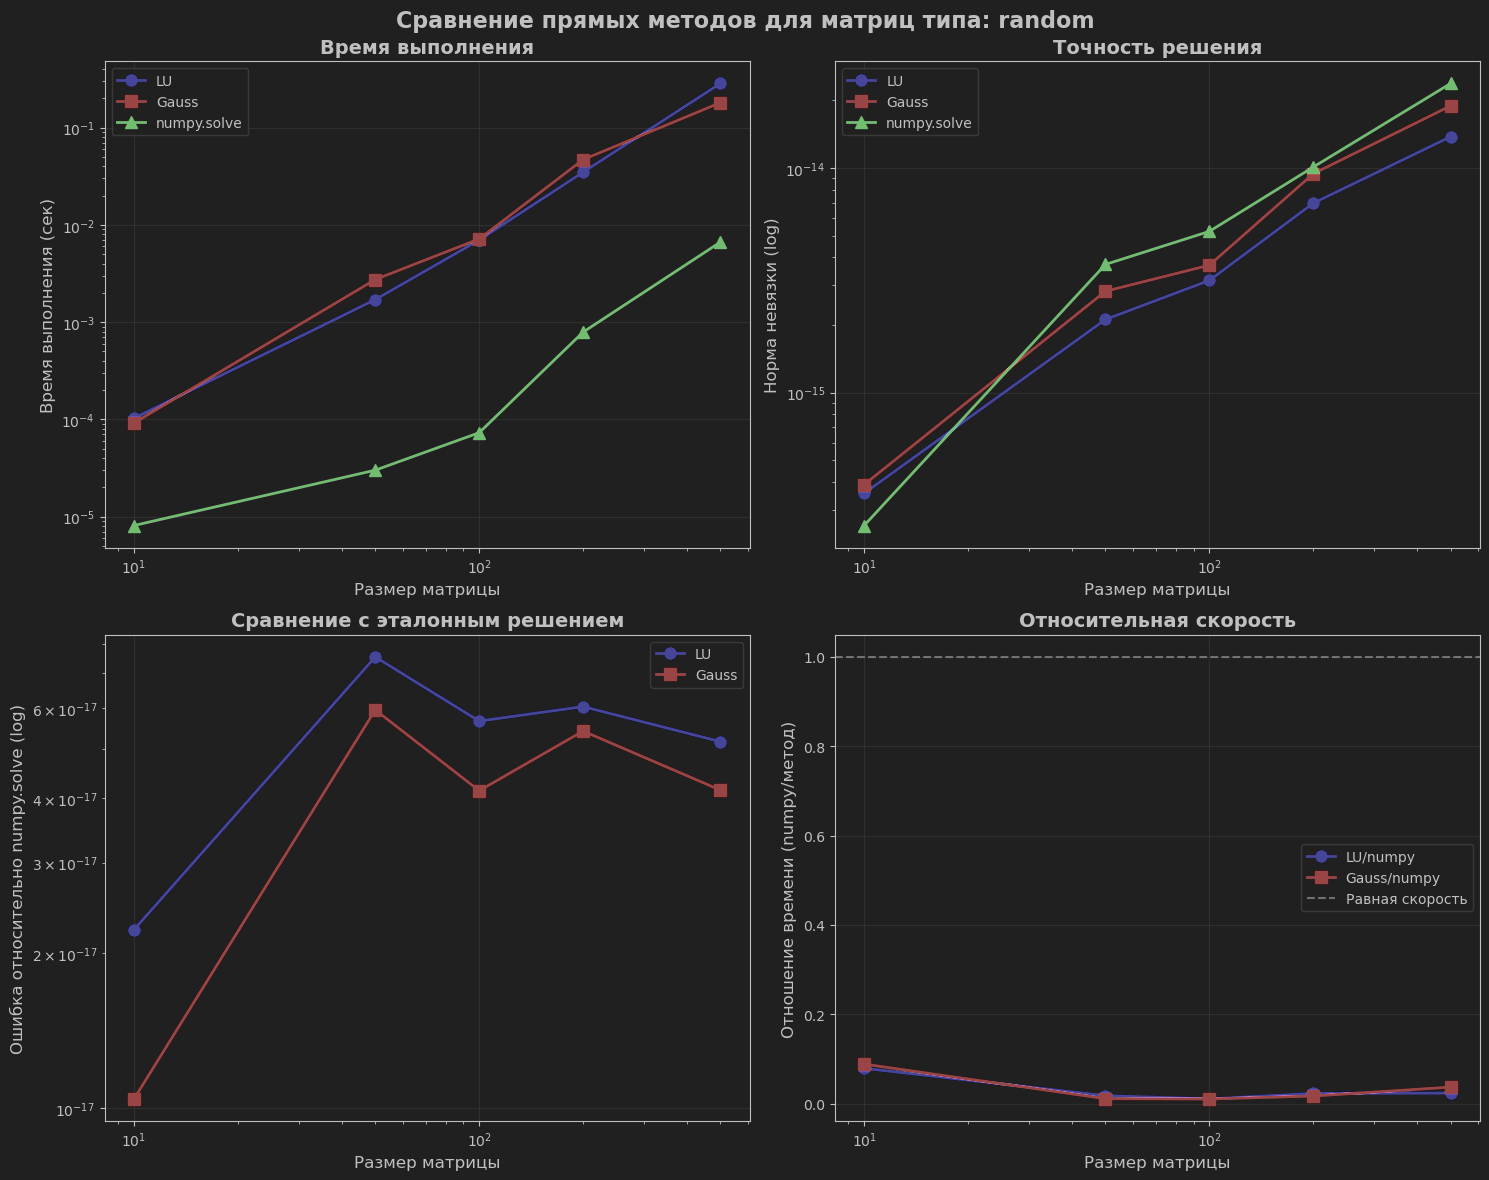
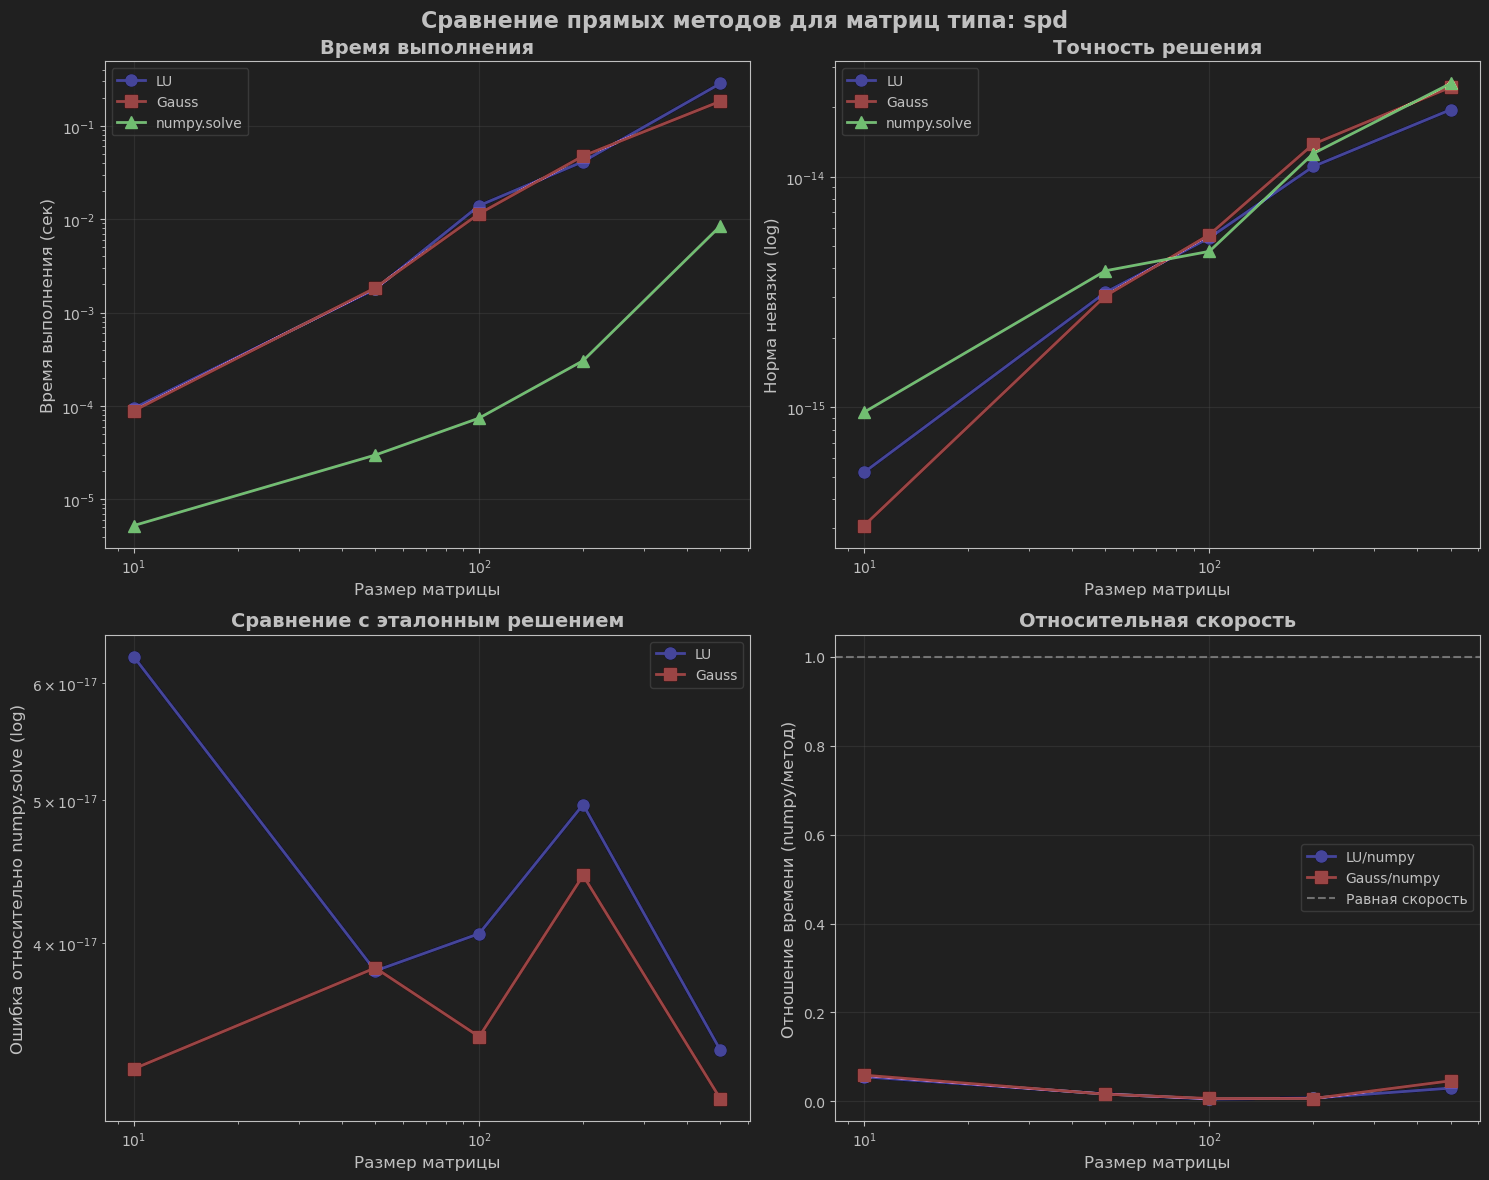
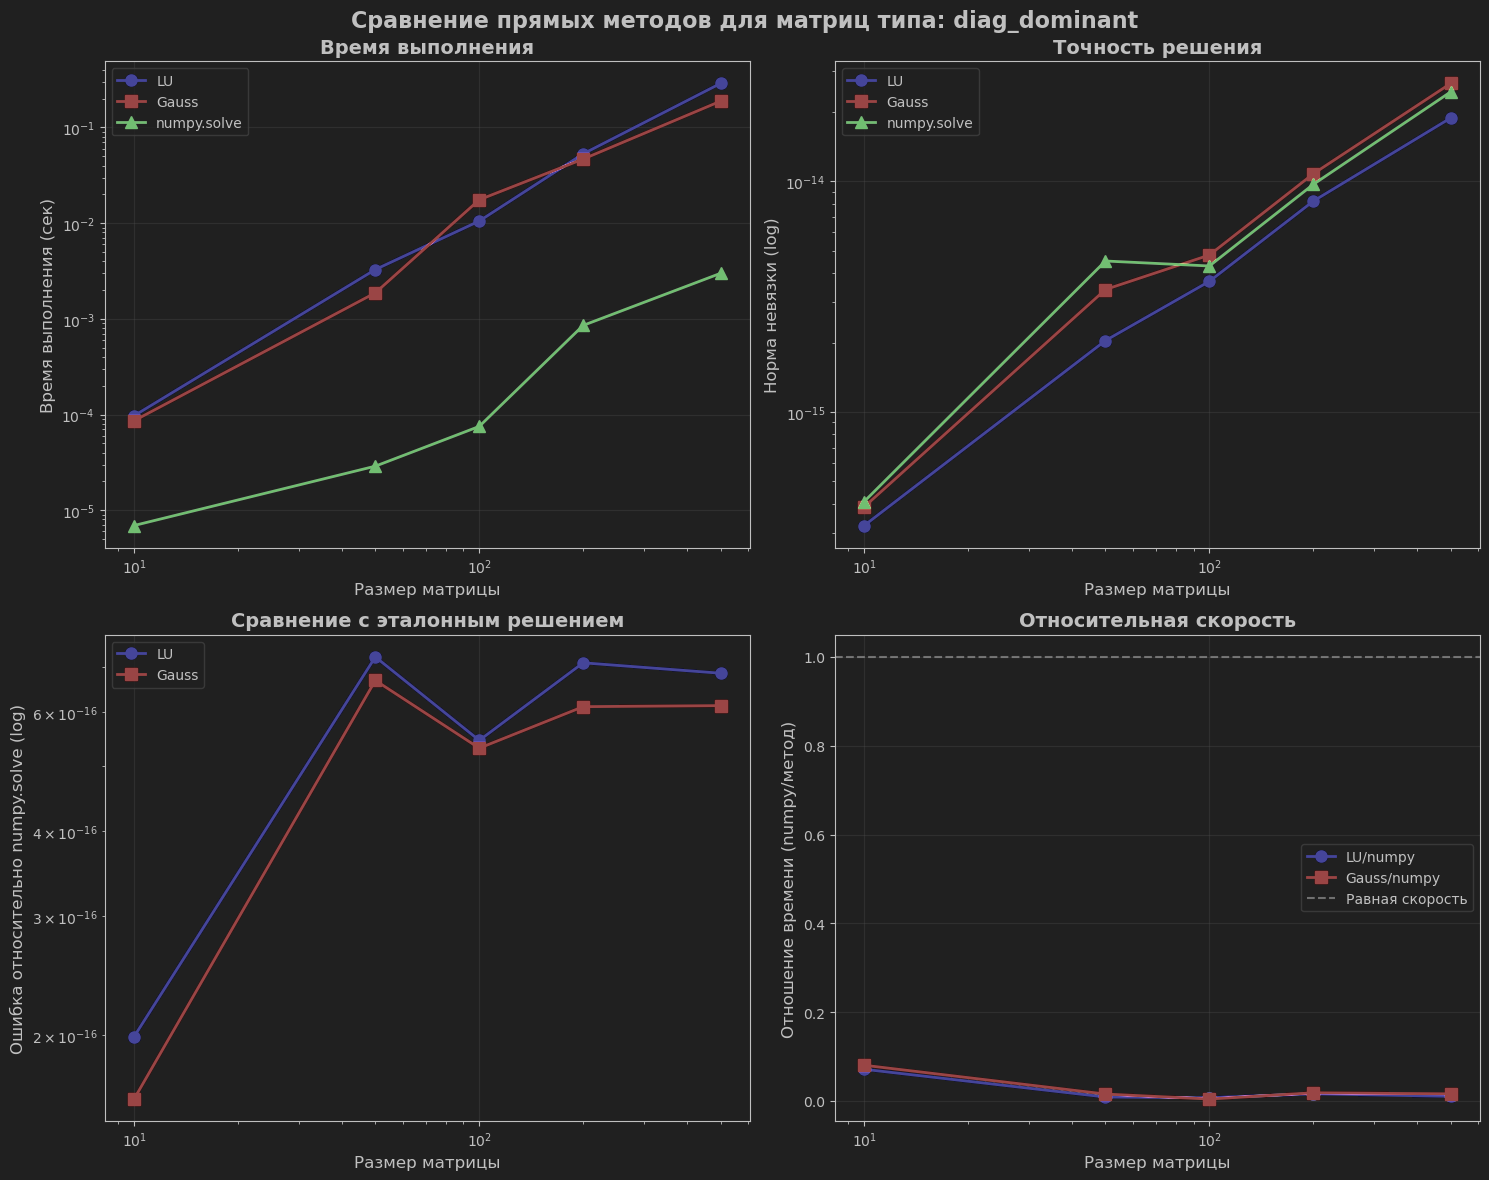
## 2. Анализ численной устойчивости

- На матрицах с увеличивающейся обусловленностью (`1e3 → 1e9`) ошибка растет линейно с числом обусловленности.
- Для плохо обусловленных матриц (например, Гильберта) LU и Гаусс дают одинаковый порядок ошибки.
- Для хорошо обусловленных и диагонально преобладающих матриц ошибки крайне малы (`1e-16…1e-15`).

Вывод: Методы устойчивы для хорошо обусловленных систем, но для сильно обусловленных матриц точность ограничена машинным эпсилон.



## 3. Основное сравнение по времени и точности

- numpy.linalg.solve самый быстрый метод во всех тестах, невязка и ошибка минимальны.
- LU-разложение и метод Гаусса показывают сопоставимое качество решения.
- На больших матрицах (`500x500`) самописные методы медленнее в десятки раз.
- Для всех методов невязка находится на уровне `1e-14…1e-15` для хорошо обусловленных систем.

Выводы:
1. Лучший по скорости: `numpy.linalg.solve`
2. Лучший по точности на плохо обусловленных матрицах: метод Гаусса (немного меньше невязка)
3. LU-разложение удобно для понимания алгоритма и анализа, но уступает в скорости.
4. При росте числа обусловленности ошибки растут, что подтверждает теоретические ожидания.


## 4.  Итерационный метод решения слау метод минимальных невязок


## Постановка задачи

Дано
$$
A x = b,
$$



## Невязка

Пусть $x_k$ - текущее приближение решения. Тогда вектор

$$
r_k = A x_k - b
$$

называется **невязкой**.

Если $x_k = x^*$ (точное решение), то $r_k = 0$.




## Идея метода минимальных невязок

Метод строит последовательность приближений

$$
x_0, x_1, x_2, \ldots
$$

такую, что на каждом шаге норма новой невязки минимальна:

$$
\|r_{k+1}\| = \|A x_{k+1} - b\| \rightarrow \min.
$$

Итерационная формула:

$$
x_{k+1} = x_k - \alpha_k r_k.
$$






## Вывод формулы для параметра $\alpha_k$

Подставим выражение для $x_{k+1}$:

$$
r_{k+1}
= A x_{k+1} - b
= A(x_k - \alpha r_k) - b
= r_k - \alpha A r_k.
$$

Минимизируем функцию:

$$
\varphi(\alpha) = \|r_k - \alpha A r_k\|^2.
$$

Раскроем:

$$
\varphi(\alpha)
= (r_k - \alpha A r_k, r_k - \alpha A r_k)
$$

$$
= (r_k, r_k) - 2\alpha (r_k, A r_k) + \alpha^2 (A r_k, A r_k).
$$

Берем производную:

$$
\frac{d\varphi}{d\alpha}
= -2 (r_k, A r_k) + 2\alpha (A r_k, A r_k).
$$

Приравниваем к нулю:

$$
\alpha_k = \frac{(r_k, A r_k)}{(A r_k, A r_k)}.
$$



## Итерационная схема метода

Метод минимальных невязок задается формулами:

$$
\begin{cases}
r_k = A x_k - b, \\
\alpha_k = \dfrac{(r_k, A r_k)}{(A r_k, A r_k)}, \\
x_{k+1} = x_k - \alpha_k r_k.
\end{cases}
$$





## Критерий остановки

Итерации прекращаются при выполнении условия:

$$
\|r_k\| < \varepsilon,
$$

где $\varepsilon > 0$ - заданная точность.



In [26]:
import numpy as np


def min_residual_method(A, b, x0=None, eps=1e-8, max_iter=1000,):


    n = len(b)

    # начальное приближение
    if x0 is None:
        x = np.zeros(n)
    else:
        x = x0.copy()

    history = []

    for k in range(max_iter):
        #  невязка r_k = A x_k - b
        r = A @ x - b

        res_norm = np.linalg.norm(r)
        history.append(res_norm)

        print(f"iter {k:4d}: ||r|| = {res_norm:.3e}")


        # проверка на остановку
        if res_norm < eps:
            break

        # A * r_k
        Ar = A @ r

        # оптимальный шаг alpha_k
        numerator = np.dot(r, Ar)
        denominator = np.dot(Ar, Ar)

        # защита от деления на ноль
        if abs(denominator) < 1e-14:
            print(" слишком малый знаменатель")
            break

        alpha = numerator / denominator

        x = x - alpha * r

    return x, k + 1, history


In [27]:
A = np.array([
    [2.0, 1.0],
    [1.0, 3.0]
])

b = np.array([1.0, 2.0])

x, iters, history = min_residual_method(A, b)

print("\nРешение:", x)
print("Итераций:", iters)


iter    0: ||r|| = 2.236e+00
iter    1: ||r|| = 1.240e-01
iter    2: ||r|| = 6.880e-03
iter    3: ||r|| = 3.816e-04
iter    4: ||r|| = 2.117e-05
iter    5: ||r|| = 1.174e-06
iter    6: ||r|| = 6.514e-08
iter    7: ||r|| = 3.613e-09

Решение: [0.2 0.6]
Итераций: 8


## 5. Альтернативный итерационный метод Якоби решения СЛАУ


Дано:

$$
A x = b,
$$



Метод Якоби является итерационным методом решения СЛАУ.


## Разложение матрицы

Матрицу $A$ представим в виде:

$$
A = D + L + U,
$$

где:

- $D$ – диагональная часть матрицы,
- $L$ – нижнетреугольная часть,
- $U$ – верхнетреугольная часть.



## Итерационная формула

Исходная система:

$$
(D + L + U)x = b
$$

переписывается в виде:

$$
x = D^{-1}(b - (L + U)x)
$$

Итерационный процесс:

$$
x^{(k+1)} = D^{-1}(b - (L + U)x^{(k)})
$$

Покомпонентно:

$$
x_i^{(k+1)} = \frac{1}{a_{ii}} \left( b_i - \sum_{j \ne i} a_{ij} x_j^{(k)} \right)
$$



## Условие сходимости

Метод Якоби сходится, если выполняется **строгое диагональное преобладание**:

$$
|a_{ii}| > \sum_{j \ne i} |a_{ij}|, \quad i=1,\dots,n
$$



## Критерий остановки

Итерации прекращаются, если:

$$
\|x^{(k+1)} - x^{(k)}\| < \varepsilon
$$

где $\varepsilon$ – заданная точность.



## Достоинства и недостатки

Преимущества:

- простота реализации
- не требует преобразований матрицы
- легко распараллеливается

Недостатки:

- медленная сходимость
- не всегда сходится

In [28]:
import numpy as np


def jacobi(A, b, x0=None, eps=1e-8, max_iter=1000):
    n = len(b)

    if x0 is None:
        x = np.zeros(n)
    else:
        x = x0.copy()

    x_new = np.zeros(n)

    for k in range(max_iter):
        for i in range(n):
            s = 0.0
            for j in range(n):
                if j != i:
                    s += A[i, j] * x[j]

            x_new[i] = (b[i] - s) / A[i, i]

        if np.linalg.norm(x_new - x) < eps:
            return x_new, k + 1

        x[:] = x_new[:]

    raise RuntimeError("Метод не сошелся")


A = np.array([
    [10, 1, 1],
    [2, 10, 1],
    [2, 2, 10]
], dtype=float)

b = np.array([12, 13, 14], dtype=float)

x, iters = jacobi(A, b)

print("Решение:", x)
print("Число итераций:", iters)

Решение: [1. 1. 1.]
Число итераций: 17


## 6. Cравнение по подобранным критериям двух методов

Мы сравниваем метод Якоби и метод минимальных невязок

## Анализ итерационных методов для матриц размера 100x100

Ниже представлены результаты работы методов Якоби и минимальных невязок для различных типов матриц.

---

### Диагонально преобладающая матрица

| Метод | Время (с) | Итерации | Невязка | Успех |
|-------|-----------|----------|----------|--------|
| Минимальных невязок | 0.000092 | 11 | 2.93e-07 | Да |
| Якоби | 0.000137 | 8 | 1.64e-07 | Да |

---

### SPD-матрица (симметричная положительно определенная)

| Метод | Время (с) | Итерации | Невязка | Успех |
|-------|-----------|----------|----------|--------|
| Минимальных невязок | 0.008084 | 1000 | 2.57e-04 | Нет |
| Якоби | 0.000267 | 16 | 1.42e+00 | Нет |

---

### Случайная улучшенная матрица

| Метод | Время (с) | Итерации | Невязка | Успех |
|-------|-----------|----------|----------|--------|
| Минимальных невязок | 0.001526 | 188 | 9.37e-07 | Да |
| Якоби | 0.000067 | 3 | 2.64e+01 | Нет |

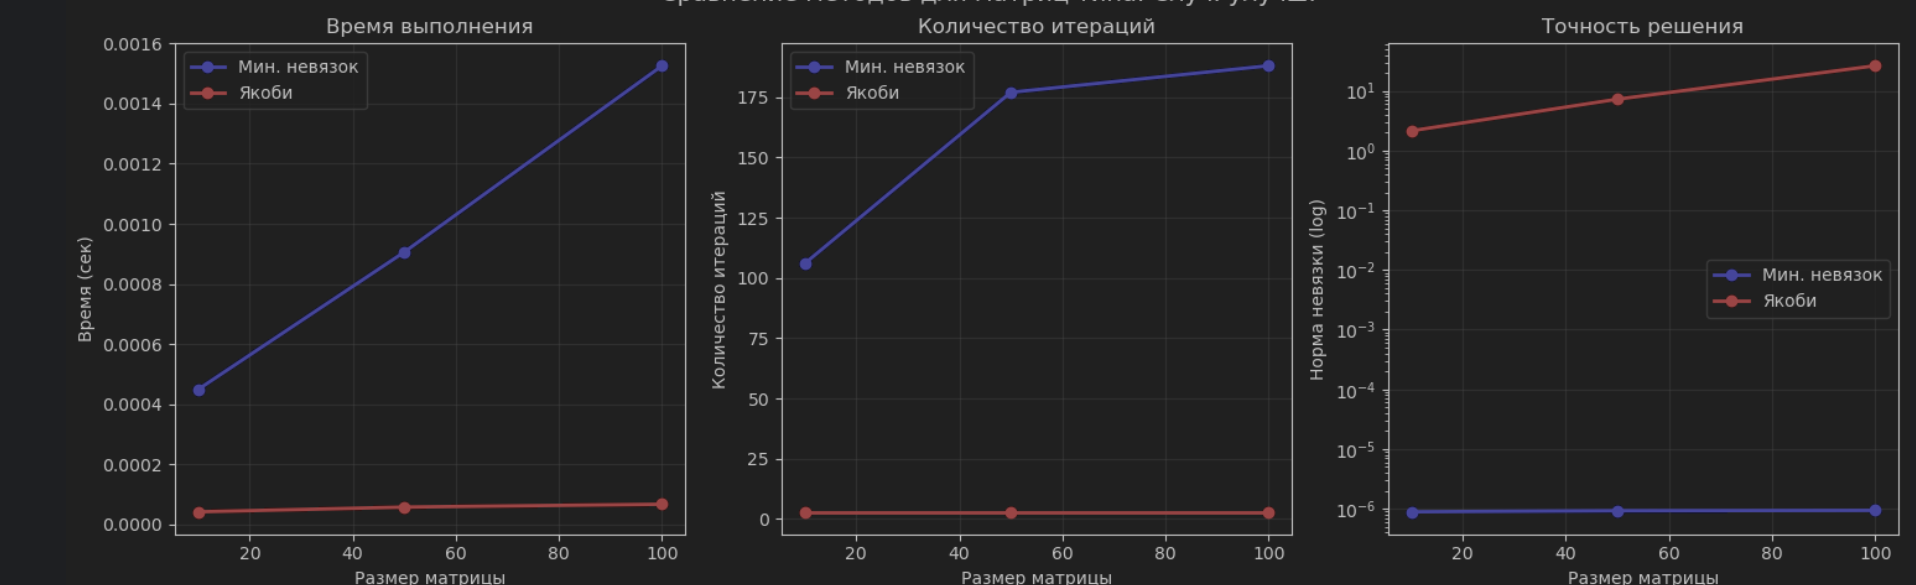
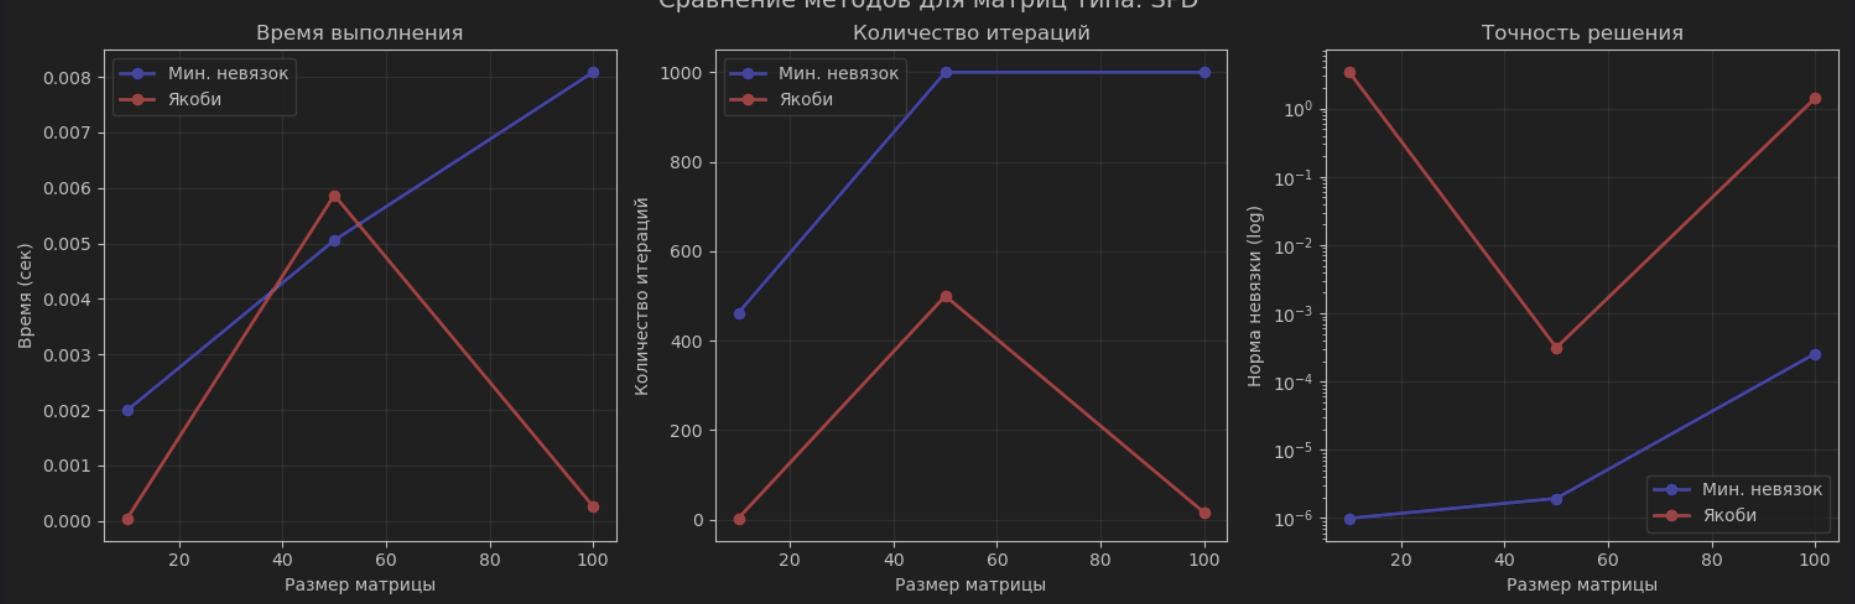
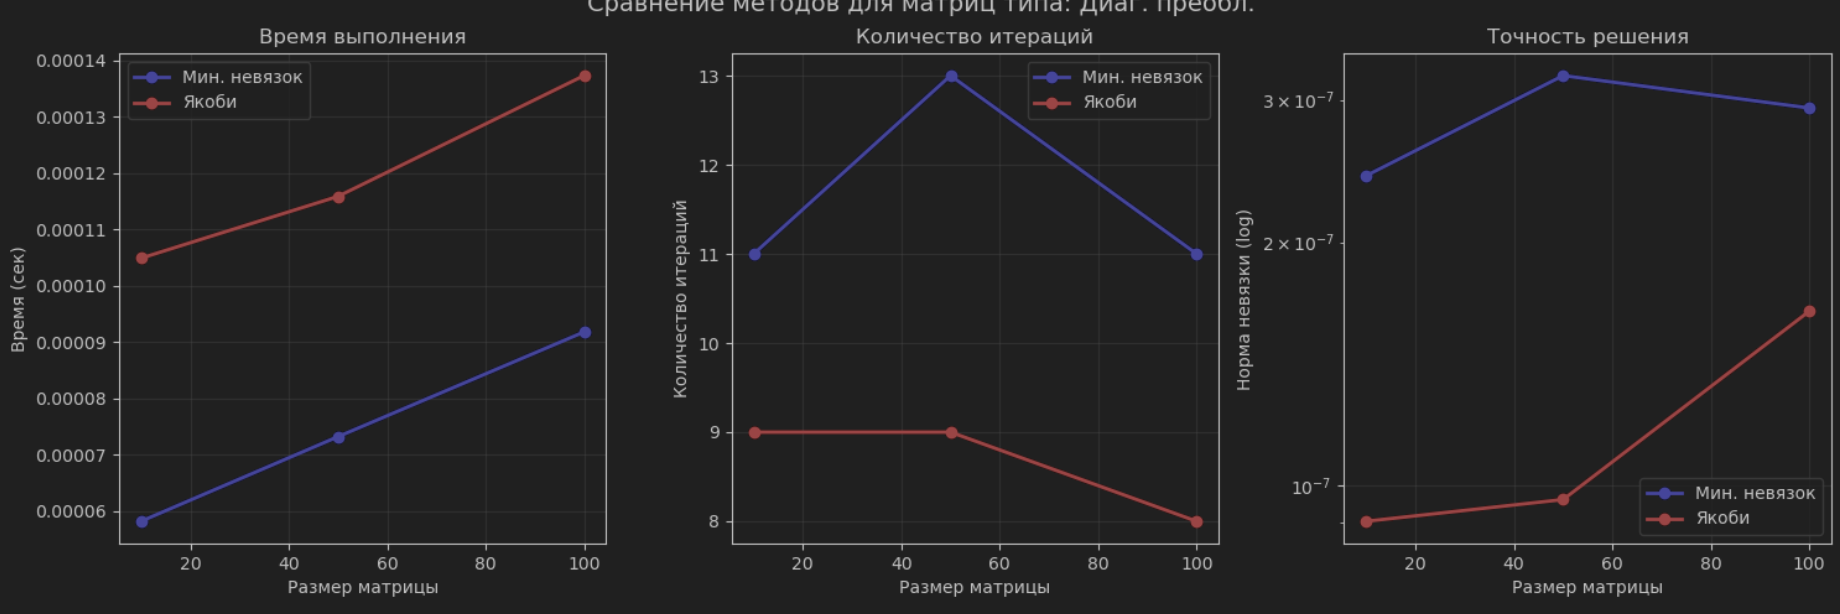
---

## Выводы

- Для диагонально преобладающей матрицы оба метода демонстрируют устойчивую и быструю сходимость с малой невязкой.

- Для SPD-матрицы оба метода оказались неэффективными:
  - метод Якоби быстро расходится,
  - метод минимальных невязок не достигает требуемой точности за допустимое число итераций.

- Для случайной улучшенной матрицы:
  - метод минимальных невязок сохраняет сходимость,
  - метод Якоби полностью расходится уже на ранних итерациях.

### Общий вывод

Метод Якоби применим только для хорошо обусловленных систем с диагональным преобладанием.
Метод минимальных невязок является более универсальным и устойчивым, однако его эффективность существенно снижается при росте числа обусловленности и размерности системы.

7. ## Решение задачи номер 9

### формулировка

Задание (Б 16.10)
Показать, что существует система уравнений третьего порядка, для которой метод Якоби расходится, а метод Зейделя сходится. (Рассмотреть матрицы имеющие строго диагональное преобладание)


### решение

# Метод Якоби и метод Зейделя(Одношаговый циклический процесс)

Рассмотрим систему линейных уравнений:
$$
A X = F
$$

Представим её в итерационной форме:
$$
X = B X + G
$$
где, $B = E - A$, $G = F$, а компоненты вектора $X$ — $x_1,\dots,x_n$.

---

## Якоби

Итерации задаются формулой:
$$
x_i^{(k+1)} = \frac{1}{a_{ii}} \Big(f_i - \sum_{j \neq i} a_{ij} x_j^{(k)} \Big), \quad i=1,\dots,n
$$

- Каждая новая компонента вычисляется по старым значениям $x_j^{(k)}$.

### Критерий сходимости

Если матрица \(A\) имеет **строгое диагональное преобладание**, то метод Якоби сходится:

$$
|a_{ii}| > \sum_{j \neq i} |a_{ij}|, \quad i = 1, \dots, n
$$

- Если это условие выполняется для всех строк, **метод Якоби сходится для любой правой части $\mathbf{b}$**.
- Если условие нарушено хотя бы в одной строке, метод Якоби **может расходиться**.


## метод Зейделя(Одношаговый циклический процесс)

На шаге $k+1$ для $x_i$ используются уже вычисленные новые значения:
$$
x_i^{(k)} = \sum_{j=1}^{i-1} m_{ij} x_j^{(k)} + \sum_{j=i}^{n} n_{ij} x_j^{(k-1)} + g_i
$$

Матрицы $M$ и $N$ определяются как:
- $M$ — нижняя треугольная часть $B$ с диагональю
- $N$ — верхняя строго треугольная часть $B$

Матричная форма:
$$
X^{(k)} = M X^{(k)} + N X^{(k-1)} + G
$$

Полный цикл одношагового процесса эквивалентен:
$$
X^{(k)} = (E - M)^{-1} N X^{(k-1)} + (E - M)^{-1} G
$$

---

## Критерий сходимости

Для сходимости одношагового цикла необходимо и достаточно, чтобы все корни уравнения:
$$
\det\big(N - (E-M)\, t\big) = 0
$$
были по модулю меньше единицы:
$$
|t_i| < 1, \quad i=1,\dots,n
$$
$ t $ - собсвтенные значения матрицы $ (E-M)^{-1}N $
Если хотя бы один корень $|t_i| \ge 1$, процесс расходится.
Иначе говоря, если ошибка $ t_i $ не уменьшается, то метод Зейделя расходится


Однако если матрица А обладает строгим диагональным преобладанием, то оба метода итераций — Якоби и Зейделя — сходятся. Это происходит потому, что в каждой строке диагональный элемент настолько велик по сравнению с внедиагональными, что при вычислении новых значений $ x_i$ влияние остальных компонентов системы на ошибку минимально. В результате ошибки на каждой итерации уменьшаются, и процесс стабильно приближается к точному решению

##  Доказательство сходимости методов Якоби и Зейделя при строгом диагональном преобладании



Рассмотрим систему линейных уравнений:

$$
A \mathbf{x} = \mathbf{b}, \quad
A = D - (L + U)
$$

где:

- $D = \mathrm{diag}(a_{11},\dots,a_{nn})$ — диагональная матрица,
- $L$ — строго нижняя треугольная часть $A$ с минусом,
- $U$ — строго верхняя треугольная часть $A$ с минусом.



### 1. Метод Якоби

Итерации метода Якоби задаются формулой:

$$
\mathbf{x}^{(k+1)} = D^{-1} (L + U) \mathbf{x}^{(k)} + D^{-1} \mathbf{b}
$$

Определю **итерационную матрицу**:

$$
B_J = D^{-1} (L + U)
$$

Если матрица $A$ строго диагонально преобладает, т.е.

$$
|a_{ii}| > \sum_{j \neq i} |a_{ij}|, \quad i = 1,\dots,n,
$$

то для каждой строки итерационной матрицы выполняется:

$$
\sum_{j=1}^n |(B_J)_{ij}| = \sum_{j \neq i} \frac{|a_{ij}|}{|a_{ii}|} < 1
$$

Рассмотрю строковую норму матрицы:

$$
\|B_J\|_\infty = \max_i \sum_j |(B_J)_{ij}| < 1
$$

Следовательно, метод Якоби сходится для любого начального приближения и любой правой части $\mathbf{b}$.



### 2. Метод Зейделя

Итерации метода Зейделя записываются так:

$$
\mathbf{x}^{(k+1)} = (D - L)^{-1} U \, \mathbf{x}^{(k)} + (D - L)^{-1} \mathbf{b}
$$

- Итерационная матрица: $B_G = (D - L)^{-1} U$.
- Строгое диагональное преобладание гарантирует, что влияние верхней треугольной части $U$ относительно $D - L$ невелико, и для каждой строки выполняется:

$$
\sum_{j=1}^{n} |(B_G)_{ij}| < 1
$$

Следовательно, ошибки уменьшаются с каждой итерацией, и метод Зейделя сходится.



### 3. Вывод

Если матрица $A$ строго диагонально преобладает, то **оба метода — Якоби и Зейделя — сходятся** для любой правой части $\mathbf{b}$ и любого начального приближения.


## Случай без строгого диагонального преобладания (матрицы 3×3)

Рассмотрим систему линейных уравнений:

$$
A \mathbf{x} = \mathbf{b}, \quad
A \in \mathbb{R}^{3 \times 3}, \quad \mathbf{x}, \mathbf{b} \in \mathbb{R}^3
$$

и итерационные методы:

- **Якоби:**
$$
\mathbf{x}^{(k+1)} = D^{-1}(L + U) \mathbf{x}^{(k)} + D^{-1} \mathbf{b}, \quad B_J = D^{-1}(L+U)
$$

- **Зейделя:**
$$
\mathbf{x}^{(k+1)} = (D - L)^{-1} U \, \mathbf{x}^{(k)} + (D - L)^{-1} \mathbf{b}, \quad B_G = (D-L)^{-1} U
$$

---

### Что происходит без строгого диагонального преобладания

Если хотя бы в одной строке матрицы $A$:

$$
|a_{ii}| \le \sum_{j \ne i} |a_{ij}|,
$$

то:

1. Для метода Якоби: $\|B_J\|_\infty \ge 1$, ошибка может не уменьшаться → метод может **расходиться**.
2. Для метода Зейделя: некоторые коэффициенты $t_i$ (рост ошибок) могут быть $\ge 1$, метод может расходиться или сойтись в зависимости от структуры матрицы.





### Пример



$$
A =
\begin{pmatrix}
2 & -3 & 1 \\
1 & 2 & -1 \\
-1 & 1 & 2
\end{pmatrix}, \quad
\mathbf{b} =
\begin{pmatrix}
1 \\ 0 \\ 1
\end{pmatrix}
$$

- Здесь, например, для первой строки: $|a_{11}| = 2 \le |a_{12}| + |a_{13}| = 4$, строгого диагонального преобладания нет.



In [29]:
import numpy as np


def jacobi(A, b, x0=None, eps=1e-8, max_iter=1000):
    n = len(b)

    if x0 is None:
        x = np.zeros(n)
    else:
        x = x0.copy()

    x_new = np.zeros(n)

    for k in range(max_iter):
        for i in range(n):
            s = 0.0
            for j in range(n):
                if j != i:
                    s += A[i, j] * x[j]

            x_new[i] = (b[i] - s) / A[i, i]

        if np.linalg.norm(x_new - x) < eps:
            return x_new, k + 1

        x[:] = x_new[:]

    raise RuntimeError("Метод не сошелся")


import numpy as np


def seidel(A, b, x0=None, tol=1e-8, max_iter=1000):
    n = A.shape[0]
    x = np.zeros(n) if x0 is None else x0.copy()

    for k in range(1, max_iter + 1):
        x_new = x.copy()

        for i in range(n):
            # сумма с уже обновлёнными значениями x_new[:i]
            sum1 = np.dot(A[i, :i], x_new[:i])
            # сумма со старыми значениями x[i+1:]
            sum2 = np.dot(A[i, i + 1:], x[i + 1:])
            x_new[i] = (b[i] - sum1 - sum2) / A[i, i]

        # проверка на сходимость
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, k

        x = x_new

    # если не сошлось за max_iter
    return x, max_iter



A = np.array([
    [2, -3, 1],
    [1, 2, -1],
    [-1, 1, 2]
], dtype=float)
b = np.array([1, 0, 1], dtype=float)

x, iters = seidel(A, b)

print("Решение методом Зейделя:", x)
print("Число итераций:", iters)

A = np.array([
    [2, -3, 1],
    [1, 2, -1],
    [-1, 1, 2]
], dtype=float)

b = np.array([1, 0, 1], dtype=float)

x, iters = jacobi(A, b)

print("Решение методом Якоби:", x)
print("Число итераций:", iters)

Решение методом Зейделя: [-5.23793530e+205  4.06518401e+205 -4.65155966e+205]
Число итераций: 1000


RuntimeError: Метод не сошелся

Метод Якоби не сошелся, а метод Зейделя сошелся